### Basic Setting

In [1]:
data_dir = './data/project2_data/'
train_data = data_dir+'olid-training-v1.0.tsv'
test_data_file = data_dir+'testset-levelb.tsv'
test_ans_file = data_dir+'labels-levelb.csv'
import re
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
regex = re.compile('[^a-zA-Z]')
pos = 'TIN'
neg = 'UNT'

In [2]:
def process_sent(sent):
    segs = sent.split()
    remove = [regex.sub('', i) for i in segs]
    return remove

### Loading training data

In [3]:
first = True
vocab = {}
train_w = {}
train_label = {}
with open(train_data, 'r') as f:
    for line in f:
        if first:
            first = False
            continue
        segs = line.split('\t')
        id = segs[0]
        sent = segs[1]
        label = segs[3]
        if label == 'NULL': continue
        sent = process_sent(sent)
        for w in sent:

            if w not in vocab:
                vocab[w] = {}
                vocab[w][pos] = 0
                vocab[w][neg] = 0
            
            vocab[w][label] += 1
        train_label[str(id)] = label
        train_w[str(id)] = sent

In [4]:
vocab_ratio = [(w, vocab[w][pos]/(vocab[w][neg]+vocab[w][pos])) for w in vocab]

In [5]:
vocab_ratio.sort(reverse=True, key=lambda x:x[1])
print(vocab_ratio[:100])

[('Kookoo', 1.0), ('mass', 1.0), ('shootings', 1.0), ('ups', 1.0), ('propaganda', 1.0), ('divide', 1.0), ('major', 1.0), ('terrorism', 1.0), ('Canada', 1.0), ('CUCK', 1.0), ('LooneyLeft', 1.0), ('fking', 1.0), ('Qproofs', 1.0), ('TrudeauMustGo', 1.0), ('traitor', 1.0), ('DeepStateCorruption', 1.0), ('Throwing', 1.0), ('BULLSHIT', 1.0), ('Flag', 1.0), ('nonsense', 1.0), ('PutUpOrShutUp', 1.0), ('CallTheVoteAlready', 1.0), ('Kind', 1.0), ('associate', 1.0), ('communist', 1.0), ('members', 1.0), ('Da', 1.0), ('room', 1.0), ('womens', 1.0), ('Pick', 1.0), ('Tbh', 1.0), ('general', 1.0), ('connect', 1.0), ('annoyance', 1.0), ('stalling', 1.0), ('lately', 1.0), ('DEMSUCK', 1.0), ('Gen', 1.0), ('Flynns', 1.0), ('sentencing', 1.0), ('keeps', 1.0), ('rescheduled', 1.0), ('expected', 1.0), ('placate', 1.0), ('violent', 1.0), ('leftiststerrorists', 1.0), ('KavanaughConfirmation', 1.0), ('woke', 1.0), ('British', 1.0), ('basically', 1.0), ('fullon', 1.0), ('voters', 1.0), ('Coincidence', 1.0), ('p

### Define score and condition

In [6]:
def count_score(sent):
    score = 0
    for w in sent:
        if w in vocab and vocab[w][pos]>7*vocab[w][neg]:
            score += vocab[w][pos]/(vocab[w][neg]+vocab[w][pos])
    return score/len(sent)

In [7]:
record = {
    pos: [],
    neg: []
}
for id in train_w:
    score = count_score(train_w[id])
    record[train_label[id]].append(score)

In [8]:
vocab['USER']

{'TIN': 7925, 'UNT': 1022}

### Show Score Distrubution

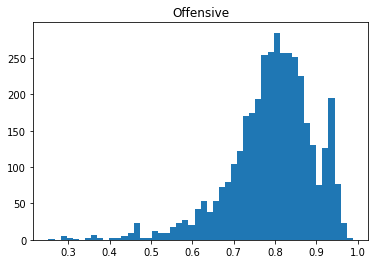

3876
0.7918615171411045


In [9]:
plt.hist(record[pos], bins='auto')
plt.title("Offensive")
plt.show()
print(len(record[pos]))
print(sum(record[pos])/len(record[pos]))

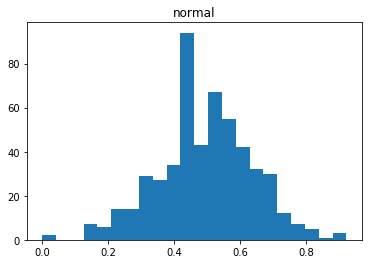

524
0.49252773862972754


In [10]:
plt.hist(record[neg], bins='auto')
plt.title("normal")
plt.show()
print(len(record[neg]))
print(sum(record[neg])/len(record[neg]))

### Apply on testing data

In [11]:
thres = 0.3

In [12]:
def predict(sent):
    if count_score(sent) > thres:
        return pos
    return neg

In [13]:
train_predict = {}
for id in train_w:
    train_predict[id] = predict(train_w[id])

In [14]:
test_w = {}
with open(test_data_file, 'r') as f:
    first = True
    for line in f:
        if first:
            first = False
            continue
        segs = line.split('\t')
        id = segs[0]
        sent = segs[1]
        
        test_w[str(id)] = process_sent(sent)

In [15]:
test_predict = {}
for id in test_w:
    test_predict[id] = predict(test_w[id])

In [16]:
test_ans = {}
with open(test_ans_file, 'r') as f:
    for line in f:
        segs = line.strip().split(',')
        id = segs[0]
        label = segs[1]
        test_ans[id] = label

In [17]:
def count_acc(predict, ans):
    correct = 0
    for id in predict:
        if predict[str(id)] == ans[str(id)]:
            correct += 1
    return correct / len(predict)

### Result

In [18]:
train_label_list = list(train_label.values())
train_pre_list = list(train_predict.values())
print('train f1:', f1_score(train_label_list,train_pre_list
                            , labels=[pos, neg], pos_label=pos, average='macro'))

test_label_list = list(test_ans.values())
test_pre_list = list(test_predict.values())
print('test f1:', f1_score(test_label_list,test_pre_list
                            , labels=[pos, neg], pos_label=pos, average='macro'))

train f1: 0.5696691609396398
test f1: 0.49776785714285715


/home/b05902066/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1052: UserWarning: Note that pos_label (set to 'TIN') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
